In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [18]:
# import pandas as pd

# original_max_rows = pd.options.display.max_rows  # Save the current setting

In [19]:
df = pd.read_csv('mandar_gurgaon_properties_missing_value_imputation.csv')

In [20]:
df.shape

(3554, 18)

In [21]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,2,2,1,5.0,Moderately Old,1239.0,0,0,0,0,0,0,0
1,flat,ireo skyon,sector 60,2.15,23344.0,2,3,2,5.0,Relatively New,1250.0,0,1,0,0,0,1,49
2,flat,dlf regal gardens,sector 90,1.23,7053.0,3,3,2,19.0,Relatively New,1578.0,0,0,0,0,1,0,6
3,house,independent,sector 2,5.00,15385.0,6,6,2,1.0,Moderately Old,3611.0,0,0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,18999.0,4,4,3,15.0,New Property,3956.0,0,0,0,0,0,0,61


### We want to calculate the average price_per_sqft for each sector and then plot it on a geo-map. Therefore we would need latitude and longitude value for that. We don't have that, so we have used a latitude longitude scraper to find the latitude and longitude of each sector and stored in latlong.csv file

In [22]:
# df['sector'].unique.shape

In [23]:
latlong = pd.read_csv('latlong.csv')

In [24]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [25]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [26]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [27]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [28]:
new_df = df.merge(latlong, on='sector')

In [29]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,2,2,1,5.0,Moderately Old,...,0,0,0,0,0,0,0,"28.3733° N, 76.9729° E",28.3733,76.9729
1,flat,ireo skyon,sector 60,2.15,23344.0,2,3,2,5.0,Relatively New,...,0,1,0,0,0,1,49,"28.4003° N, 77.0975° E",28.4003,77.0975
2,flat,dlf regal gardens,sector 90,1.23,7053.0,3,3,2,19.0,Relatively New,...,0,0,0,0,1,0,6,"28.4085° N, 76.9369° E",28.4085,76.9369
3,house,independent,sector 2,5.00,15385.0,6,6,2,1.0,Moderately Old,...,0,0,0,0,0,0,0,"28.5095° N, 77.0320° E",28.5095,77.0320
4,flat,dlf the arbour,sector 63,7.52,18999.0,4,4,3,15.0,New Property,...,0,0,0,0,0,0,61,"28.3971° N, 77.0867° E",28.3971,77.0867


In [30]:
# group_df['sector'] = group_df['sector'].str.replace('sector 17a','sector 17')
# group_df['sector'] = group_df['sector'].str.replace('sector 17b','sector 17')
# group_df['sector'] = group_df['sector'].str.replace('sector 37c','sector 37')
# group_df['sector'] = group_df['sector'].str.replace('sector 88b','sector 88')
# group_df['sector'] = group_df['sector'].str.replace('sector 99a','sector 99')
# group_df['sector'] = group_df['sector'].str.replace('sector 10a','sector 10')

new_df['sector'] = new_df['sector'].str.replace('sector 17a','sector 17')
new_df['sector'] = new_df['sector'].str.replace('sector 17b','sector 17')
new_df['sector'] = new_df['sector'].str.replace('sector 37c','sector 37')
new_df['sector'] = new_df['sector'].str.replace('sector 88b','sector 88')
new_df['sector'] = new_df['sector'].str.replace('sector 99a','sector 99')
new_df['sector'] = new_df['sector'].str.replace('sector 10a','sector 10')

In [31]:
group_df = new_df[['sector','price','price_per_sqft','built_up_area','latitude','longitude']]
group_df

,sector,price,price_per_sqft,built_up_area,latitude,longitude
0,sector 78,0.75,6053.0,1239.0,28.3733,76.9729
1,sector 60,2.15,23344.0,1250.0,28.4003,77.0975
2,sector 90,1.23,7053.0,1578.0,28.4085,76.9369
3,sector 2,5.00,15385.0,3611.0,28.5095,77.0320
4,sector 63,7.52,18999.0,3956.0,28.3971,77.0867
...,...,...,...,...,...,...
3288,sector 65,4.95,15906.0,2816.0,28.4030,77.0690
3289,sector 59,4.02,17501.0,2550.0,28.4051,77.1097
3290,sector 113,3.72,13985.0,2956.0,28.5287,77.0233
3291,sector 50,2.65,10685.0,2470.0,28.4178,77.0628


In [39]:
group_df = group_df.groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]

In [40]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.448400,77.021000
manesar,0.962258,4608.064516,2027.367742,28.351500,76.942800
sector 1,1.860000,8249.833333,2327.833333,28.366300,76.945600
sector 10,2.092857,11866.571429,1908.857143,28.446900,77.010600
sector 102,1.696636,10603.822430,1556.130841,28.475000,76.971500
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.401400,76.922500
sector 92,0.934000,5928.290000,1571.341800,28.407900,76.915300
sector 93,0.848889,8009.888889,1017.000000,28.415300,76.932600


In [41]:
group_df.shape

(101, 5)

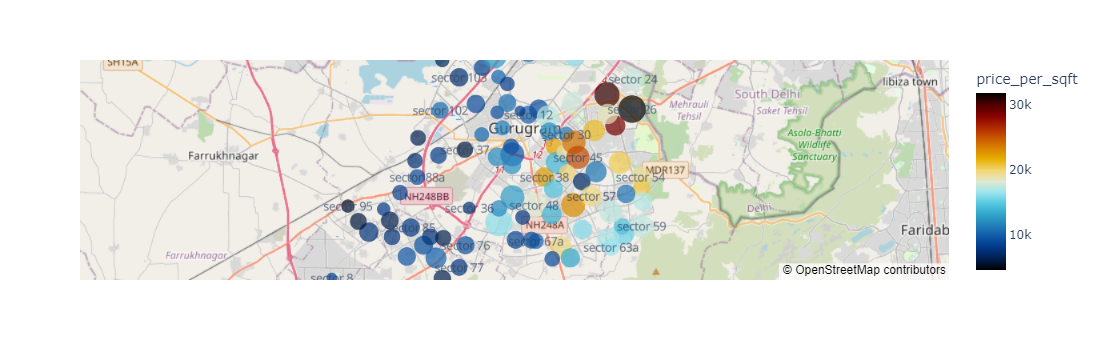

In [42]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

### From this we can observe that the size of the points which we are seeing above tells us that on average us sector mein kitne bade flats or houses milte hai

In [43]:
new_df.to_csv('mandar_data_viz1.csv',index=False)

In [44]:
df1 = pd.read_csv('mandar_gurgaon_properties.csv')

In [46]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Sector 78 Gurgaon,flat,umang monsoon breeze,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area:...,2,2,1,not available,"Sector 78, Sector 78 Gurgaon, Gurgaon, Haryana",5.0,East,undefined,"['Proposed Metro Station', 'Mahapal Shing', 'N...",Best in class property available at sector 78 ...,NaN,NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
1,2 BHK Flat in Sector 60 Gurgaon,flat,ireo skyon,2.15,23344.0,921.0,Super Built up area 1524(141.58 sq.m.)Built Up...,2,3,2,servant room,"Sector 60 Gurgaon, Gurgaon, Haryana",5.0,East,1 to 5 Year Old,"['Sector 55-56 Metro', 'Golf Course Extension'...","Situated in sector 60 gurgaon, ireo skyon is a...","['5 Wardrobe', '3 Fan', '2 Geyser', '1 Stove',...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction5 out of..."
2,3 BHK Flat in Sector 90 Gurgaon,flat,dlf regal gardens,1.23,7052.0,1744.0,Super Built up area 1744(162.02 sq.m.),3,3,2,others,"Sector 90 Gurgaon, Gurgaon, Haryana",19.0,North,1 to 5 Year Old,"['SS Omnia, Sector 86', 'Numberdar market, IMT...",Dlf regal gardens is one of the most popular d...,NaN,['Maintenance Staff'],"['Green Area5 out of 5', 'Construction4.5 out ..."
3,6 Bedroom House for sale in Palam Vihar,house,independent,5.00,15384.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6,6,2,not available,"Palam Vihar, Palam Vihar, Gurgaon, Haryana",1.0,South,undefined,NaN,Recognised as greenest area in palam vihar pal...,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Environment5 out of 5', 'Lifestyle5 out of 5..."
4,4 BHK Flat in Sector 63 Gurgaon,flat,dlf the arbour,7.52,19000.0,3958.0,Built Up area: 3956 (367.52 sq.m.)Carpet area:...,4,4,3,not available,"Sector 63, Sector 63 Gurgaon, Gurgaon, Haryana",15.0,West,undefined,"['Radhakrishna Shani Mandir', 'pracksht hospit...",Best in class property available at sector 63 ...,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN


### Now we want to make a word cloud where we can observe that for whole Gurgaon, which amenties are highly available and which are less available

In [47]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [48]:
wordcloud_df.head()

,features,sector
0,NaN,sector 78
1,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 60
2,['Maintenance Staff'],sector 90
3,NaN,sector 2
4,NaN,sector 63


### Now we will make a gaint single list which will contain all the items from the features column and then we will convert it to string as wordcloud requires string to process it

In [49]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [51]:
main

['Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Maintenance Staff',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'W

In [52]:
from wordcloud import WordCloud

In [53]:
feature_text = ' '.join(main)
# converted the giant list to string

In [55]:
import pickle
pickle.dump(feature_text, open('mandar_feature_text.pkl','wb'))

In [56]:
feature_text

'Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Maintenance Staff Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Fitness Centre / GYM Club house / Community Center Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) Maintenance Staff False Ceiling Lighting Water Storage No open drainage around Piped-gas Visitor Parking Swimming Pool Park Security Personnel Natural Light Internet/wi-fi connectivity Airy Rooms Low Density Society

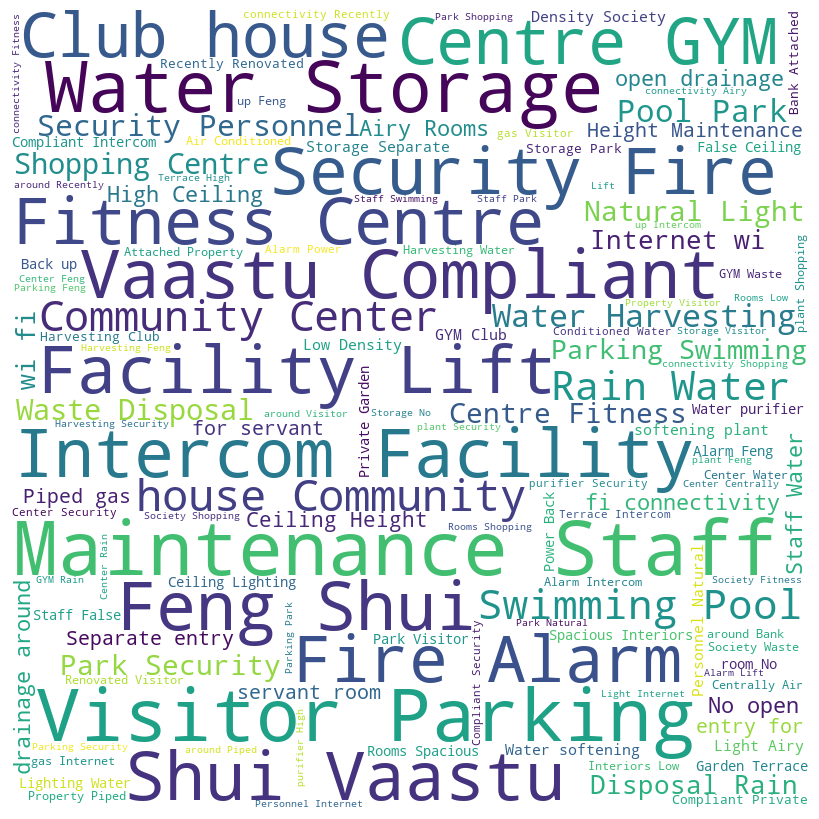

In [57]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

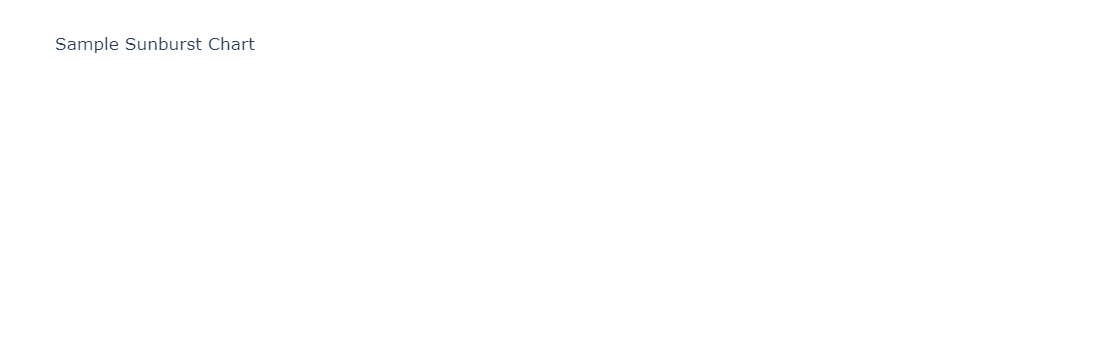

In [58]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

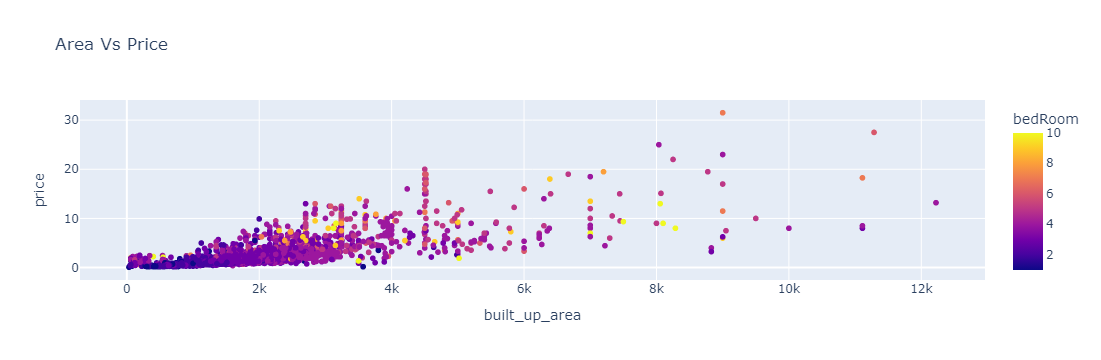

In [59]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

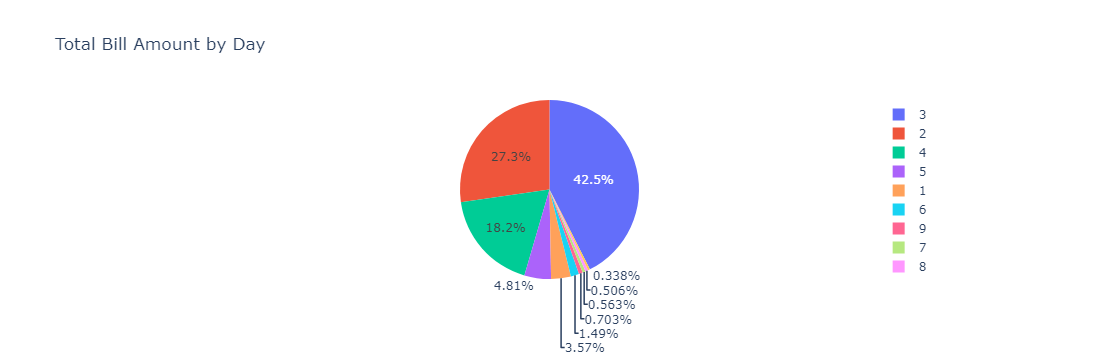

In [60]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

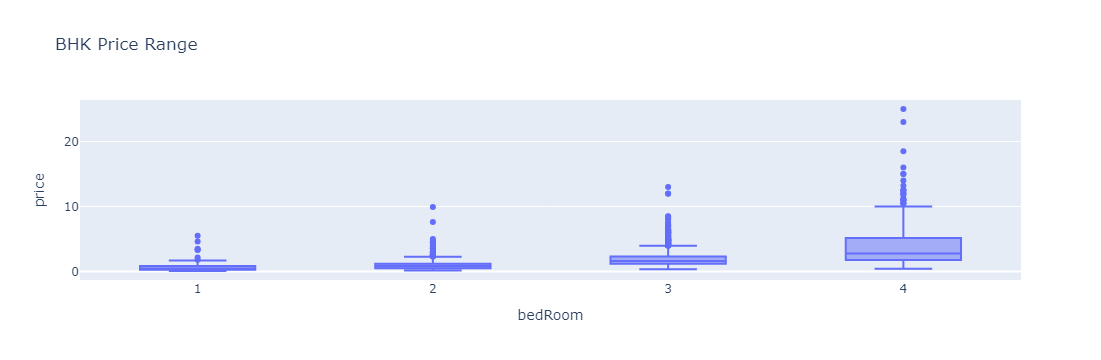

In [61]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\Nitish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Nitish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

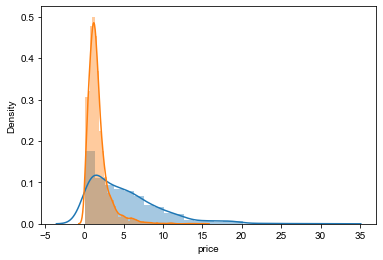

In [111]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [150]:
new_df['sector'].unique().tolist().insert(0,'overall')